In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

import sys
sys.path.append('../')
from utils import normalize

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

from collections import Counter

In [2]:
def kmeans_clustering(Di, Q):
    CA = KMeans(n_clusters=Q)
    y_r = CA.fit_predict(Di)
    
    return CA, y_r

def unlabel(x , frac):
    return np.array([-1 if np.random.rand() < frac else label for label in y ])

def most_frequent(array, ignore_vals = [-1]):
    
    cntr = Counter(array)
    
    try:
        for del_key in ignore_vals:
            del cntr[del_key]
    except:
        pass

    return cntr.most_common(1)[0][0]

def label_unlabeled_cluster(C_u_element, dist_cluster, C_n_reclass):

    C_u_distances = dist_cluster[C_u_element]

    #create index from clusters
    idx = list(range(len(C_u_distances)))

    #retrieve labels
    labels = []
    for element in idx:
        c = C_n_reclass.get(element)
        if c is None:
            c = np.inf
        labels.append(c)
    labels = np.array(labels)

    #create cluster matrix -> idx (C_n), distances, label
    cluster_matrix = np.c_[np.array(idx),C_u_distances,labels]

    #TO DO: Poderia pegar o segundo cluster com menor distancia
    #filter to don't get the same cluster and get the closest cluster
    fcluster_matrix = cluster_matrix[cluster_matrix[:,1] != 0]
    fcluster_matrix = cluster_matrix[cluster_matrix[:,2] != np.inf]
    close_cluster = fcluster_matrix[fcluster_matrix[:, 1].argsort()][0]

    #get cluster_idx and label
    cluster_idx, cluster_label = close_cluster[0],close_cluster[2]
    
    return cluster_idx, cluster_label

def unsup_prediction(Q,Di,y_r):

    #### Fit do modelo de cluster e salva em C_n 
    CA, pred_cluster = kmeans_clustering(Di, Q)

    C_u = []
    C_n_reclass = {}
    
    for C_n in np.unique(pred_cluster):

        # index dos clusteres
        cluster_insts_idx = np.where(pred_cluster == C_n)[0]

        # DEBUGGING
        #print(cluster_insts_idx)
        #print(C_n, len(y_r[cluster_insts_idx]), y_r[cluster_insts_idx]) 
        #############

        # rótulos do cluster
        cluster_labels = y_r[cluster_insts_idx]

        #caso cluster haja rótulo, vê classe majoritaria e reclassifica
        if np.sum(cluster_labels >= 0).sum() :
            cntr_labels = Counter(y_r[cluster_insts_idx])
            cluster_mode = most_frequent(cntr_labels,ignore_vals = [-1])
            y_r[cluster_insts_idx] = [cluster_mode for cluster_label in y_r[cluster_insts_idx]]

            #popula dicionario de reclassificaco
            C_n_reclass[C_n] = cluster_mode

        else:
            C_u.append(C_n)
    
    if len(C_u) > 0:
        dist_cluster = pairwise_distances(X = CA.cluster_centers_)

        for C_u_element in C_u:
            cluster_idx, cluster_label = label_unlabeled_cluster(C_u_element, dist_cluster, C_n_reclass)
#             print('-'*20)
#             print(C_u_element, cluster_idx, cluster_label)

            cluster_insts_idx = np.where(pred_cluster == C_u_element)[0] 
#             print(y_r[cluster_insts_idx],cluster_label)
            y_r[cluster_insts_idx] = [cluster_label for z in y_r[cluster_insts_idx]]

    return y_r

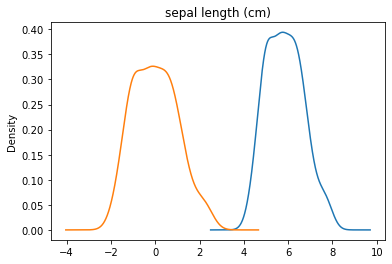

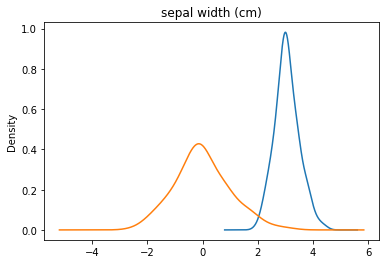

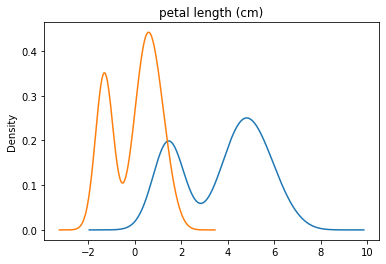

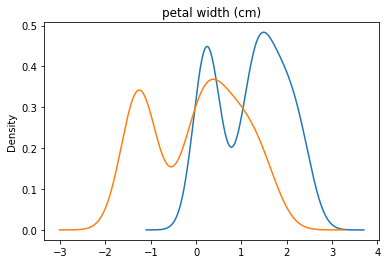

In [3]:
X = pd.DataFrame(load_iris()['data'], columns=load_iris()['feature_names'])
y = load_iris()['target']

df = pd.concat([X,pd.Series(y,name='class')],axis=1)
df = df.sample(len(df))

X['sepal length (cm)'].plot(kind='kde')
X_norm, mu, sigma = normalize(X)
X_norm['sepal length (cm)'].plot(kind='kde')
plt.title('sepal length (cm)')
plt.show()

X['sepal width (cm)'].plot(kind='kde')
X_norm, mu, sigma = normalize(X)
X_norm['sepal width (cm)'].plot(kind='kde')
plt.title('sepal width (cm)')
plt.show()

X['petal length (cm)'].plot(kind='kde')
X_norm, mu, sigma = normalize(X)
X_norm['petal length (cm)'].plot(kind='kde')
plt.title('petal length (cm)')
plt.show()

X['petal width (cm)'].plot(kind='kde')
X_norm, mu, sigma = normalize(X)
X_norm['petal width (cm)'].plot(kind='kde')
plt.title('petal width (cm)')
plt.show()

In [4]:
#test case for most_frequent inside array
array = [-1, 2, -1, -1, 2, -1, -1, -1, 0,-1]
cntr = Counter(array)
val = most_frequent(cntr,ignore_vals = [-1])
assert val != -1

In [14]:
X = df.drop(columns = 'class').to_numpy()
Di=X[:,:2]

y = df['class'].to_numpy()
y_r = unlabel(y,frac = 0.95)
y_noisy = y_r.copy()

K = 9
Q = 9

print(y_r)

[-1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1
 -1 -1 -1 -1 -1 -1]


In [15]:
results = []
for rounds in range(K):
    results.append(unsup_prediction(Q, Di, y_r = y_r))
    
res_df = pd.DataFrame(results).T
res_df.columns = [f'label_round_{col}' for col in res_df.columns]
res_df.sample(10)

,label_round_0,label_round_1,label_round_2,label_round_3,label_round_4,label_round_5,label_round_6,label_round_7,label_round_8
11,2,2,2,2,2,2,2,2,2
15,1,1,1,1,1,1,1,1,1
114,1,1,1,1,1,1,1,1,1
137,1,1,1,1,1,1,1,1,1
113,1,1,1,1,1,1,1,1,1
59,0,0,0,0,0,0,0,0,0
72,1,1,1,1,1,1,1,1,1
127,1,1,1,1,1,1,1,1,1
131,1,1,1,1,1,1,1,1,1
45,1,1,1,1,1,1,1,1,1


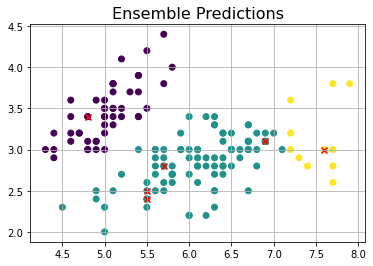

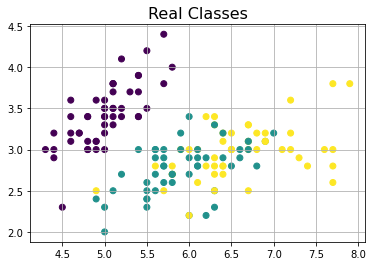

In [16]:
pred_ensemble = res_df.mode(axis=1)[0]

# centroids = CA.cluster_centers_
# centroids_x = centroids[:,0]
# centroids_y = centroids[:,1]
# plt.scatter(centroids_x,centroids_y,marker = "x", s=40,linewidths = 5, zorder = 10,c = 'black')

plt.title('Ensemble Predictions',fontsize=16)
plt.scatter(X[:,0],X[:,1],c = pred_ensemble)

X_labelled = Di[np.where(y_noisy != -1)]
plt.scatter(X_labelled[:,0],X_labelled[:,1],color='red',marker='x')

plt.grid()
plt.show()

plt.title('Real Classes',fontsize=16)
plt.scatter(X[:,0],X[:,1],c = y)
plt.grid()
plt.show()

### Usando a base inteira

In [8]:
X = df.drop(columns = 'class').to_numpy()
Di=X

y = df['class'].to_numpy()
y_r = unlabel(y,frac = 0.95)
y_noisy = y_r.copy()

K = 10
Q = 10

results = []
for rounds in range(K):
    results.append(unsup_prediction(Q, Di, y_r = y_r))
    
res_df = pd.DataFrame(results).T
res_df.columns = [f'label_round_{col}' for col in res_df.columns]
pred_ensemble = res_df.mode(axis=1)[0]

In [9]:
from sklearn.metrics import classification_report

idx_labeled = np.where(y_noisy != -1)[0]
idx_unlabeled = np.where(y_noisy == -1)[0] 

print(classification_report(y[idx_unlabeled],pred_ensemble[idx_unlabeled]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.74      1.00      0.85        45
           2       1.00      0.67      0.80        49

    accuracy                           0.89       143
   macro avg       0.91      0.89      0.88       143
weighted avg       0.92      0.89      0.89       143



In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

X_train = X[idx_labeled]
y_train = y[idx_labeled]

X_test = X[idx_unlabeled]
y_test = y[idx_unlabeled]

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print(classification_report(y[idx_unlabeled],y_pred))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        49
           1       0.47      1.00      0.64        45
           2       1.00      0.22      0.37        49

    accuracy                           0.65       143
   macro avg       0.82      0.66      0.62       143
weighted avg       0.83      0.65      0.62       143



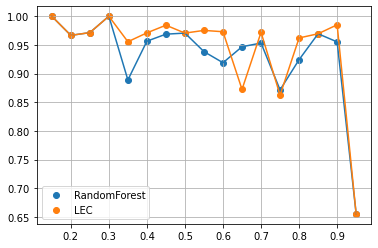

In [11]:
from sklearn.metrics import accuracy_score

X = df.drop(columns = 'class').to_numpy()
y = df['class'].to_numpy()

K = 10
Q = 10

sup_acc, lec_acc, u_perc = [],[],[]

for u_ratio in np.linspace(0.95,0.15,17):
    
    y_r = unlabel(y,frac = u_ratio)
    y_noisy = y_r.copy()
    
    #idx de dados rotulados e nao rotulados
    idx_labeled = np.where(y_noisy != -1)[0]
    idx_unlabeled = np.where(y_noisy == -1)[0] 
    
    results = []
    for rounds in range(K):
        results.append(unsup_prediction(Q, Di = X, y_r = y_r))

    res_df = pd.DataFrame(results).T
    res_df.columns = [f'label_round_{col}' for col in res_df.columns]
    pred_ensemble = res_df.mode(axis=1)[0]
    
    #Random forest é fitada com todos os dados rotulados
    rf = RandomForestClassifier()

    X_train = X[idx_labeled]
    y_train = y[idx_labeled]

    X_test = X[idx_unlabeled]
    y_test = y[idx_unlabeled]

    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    
    lec_acc.append(accuracy_score(y[idx_unlabeled],pred_ensemble[idx_unlabeled]))
    sup_acc.append(accuracy_score(y[idx_unlabeled],y_pred))
    u_perc.append(u_ratio)
    
plt.scatter(x=u_perc,y=sup_acc,label='RandomForest')
plt.scatter(x=u_perc,y=lec_acc,label='LEC')
plt.plot(u_perc, sup_acc,)
plt.plot(u_perc, lec_acc)
plt.grid()
plt.legend()

In [12]:
def kmeans_clustering(Di, Q):
    
    '''Altorimo de KMeans Clustering o qual retorna o Algoritmo de cluster e as predições das classes
    
    Input: 
        Di: Bloco de dados, ou seja as Features(X) compreendendo dados rotulados e não rotulados
        Q: Número de clusteres, perceba que é um parãmetro do kmeans
        
    Output: 
        CA: Clustering Algorithm
        y_r: Grupos preditos'''
    
    CA = KMeans(n_clusters=Q)
    y_r = CA.fit_predict(Di)
    
    return CA, y_r

def unlabel(x , frac):
    return np.array([-1 if np.random.rand() < frac else label for label in y ])

def most_frequent(array, ignore_vals = [-1]):
    '''Função auxiliar para retornar a classe que mais existe dentro do grupo excluindo os dados não rotulados'''
    
    cntr = Counter(array)
    
    try:
        for del_key in ignore_vals:
            del cntr[del_key]
    except:
        pass

    return cntr.most_common(1)[0][0]

def label_unlabeled_cluster(C_u_element, dist_cluster, C_n_reclass):
    
    C_u_distances = dist_cluster[C_u_element]

    #create index from clusters
    idx = list(range(len(C_u_distances)))

    #retrieve labels
    labels = []
    for element in idx:
        c = C_n_reclass.get(element)
        if c is None:
            c = np.inf
        labels.append(c)
    labels = np.array(labels)

    #create cluster matrix -> idx (C_n), distances, label
    cluster_matrix = np.c_[np.array(idx),C_u_distances,labels]

    #TO DO: Poderia pegar o segundo cluster com menor distancia
    #filter to don't get the same cluster and get the closest cluster
    fcluster_matrix = cluster_matrix[cluster_matrix[:,1] != 0]
    fcluster_matrix = cluster_matrix[cluster_matrix[:,2] != np.inf]
    close_cluster = fcluster_matrix[fcluster_matrix[:, 1].argsort()][0]

    #get cluster_idx and label
    cluster_idx, cluster_label = close_cluster[0],close_cluster[2]
    
    return cluster_idx, cluster_label

def unsup_prediction(Q,Di,y_r):

    #### Fit do modelo de cluster e salva em C_n 
    CA, pred_cluster = kmeans_clustering(Di, Q)

    C_u = []
    C_n_reclass = {}
    
    for C_n in np.unique(pred_cluster):

        # index dos clusteres
        cluster_insts_idx = np.where(pred_cluster == C_n)[0]

        # DEBUGGING
        #print(cluster_insts_idx)
        #print(C_n, len(y_r[cluster_insts_idx]), y_r[cluster_insts_idx]) 
        #############

        # rótulos do cluster
        cluster_labels = y_r[cluster_insts_idx]

        #caso cluster haja rótulo, vê classe majoritaria e reclassifica
        if np.sum(cluster_labels >= 0).sum() :
            cntr_labels = Counter(y_r[cluster_insts_idx])
            cluster_mode = most_frequent(cntr_labels,ignore_vals = [-1])
            y_r[cluster_insts_idx] = [cluster_mode for cluster_label in y_r[cluster_insts_idx]]

            #popula dicionario de reclassificaco
            C_n_reclass[C_n] = cluster_mode

        else:
            C_u.append(C_n)
    
    if len(C_u) > 0:
        dist_cluster = pairwise_distances(X = CA.cluster_centers_)

        for C_u_element in C_u:
            cluster_idx, cluster_label = label_unlabeled_cluster(C_u_element, dist_cluster, C_n_reclass)
#             print('-'*20)
#             print(C_u_element, cluster_idx, cluster_label)

            cluster_insts_idx = np.where(pred_cluster == C_u_element)[0] 
#             print(y_r[cluster_insts_idx],cluster_label)
            y_r[cluster_insts_idx] = [cluster_label for z in y_r[cluster_insts_idx]]

    return y_r

In [13]:
from sklearn.cluster import KMeans

def LEC(q_nj, y_r, y_cm, z, Q, t, Di, x_u, K, CAp):
    """Labelling by Ensemble of clusters

    Args:
        q_nj ([type]): number of labeled data of class j in cluster (Cn)
                       número de dados rotulados de classe j no cluster Cn
        y_r ([type]): Label of class r
                      Rótulos da classe r
        y_Cm ([type]): Label of instances in the cluster Cm
                       Rótulo de instancias no cluster Cm
        z ([type]): Index of labeled clusters
                    Index dos clusteres rotulados
        Q ([type]): Number of clusters
                    Número de clusteres
        t ([type]): Number of classes
                    Número de classes
        Di ([type]): Chunk i
                     Bloco de dados i
        x_u ([type]): Unlabeled instance
                      Dado não rotulado
        K ([type]): Number of clustering algorithms
                    Número de algoritmos de clusterização
        CAp ([type]): Clustering Algorithm p
                      Algoritmo de clusterização p
                      
        DISCLAIMER: Não HA METODOLOGIA CASO HAJA EMPATE NO NUMERO DE ROTULOS
    """
    
    for p in range(K):
        # Constroi Qp clusters (C_n, t.q n-> 1,..,Qp)
        # De acordo com CAp (uma regra/método para escolha do CA)
        
        #### Fit do modelo de cluster e salva em C_n 
        CA, pred_cluster = kmeans_clustering(Di, Q)
        
        for C_n in np.unique(pred_cluster):
            if CA == pred_cluster
            
        

SyntaxError: invalid syntax (<ipython-input-13-2a29c0737503>, line 39)